In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [2]:
df=pd.read_csv('C:/Interanship/TelecomAnomalies-main/TelecomAnomalies-main/01_Dataset.csv')

In [3]:
df.head()

Time  USER   RRC  ERAB  PRB  THR  DUR
0  11-07-2016 00:00  1546  1237   989  761  634  662
1  11-07-2016 01:00  1170   936   749  576  480  501
2  11-07-2016 02:00  1059   847   678  521  434  453
3  11-07-2016 03:00  1133   906   725  558  465  485
4  11-07-2016 04:00  1185   948   758  583  486  507

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2856 entries, 0 to 2855
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    2856 non-null   object
 1   USER    2856 non-null   int64 
 2   RRC     2856 non-null   int64 
 3   ERAB    2856 non-null   int64 
 4   PRB     2856 non-null   int64 
 5   THR     2856 non-null   int64 
 6   DUR     2856 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 156.3+ KB


In [5]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 2856
Columns  : 7

 Features 
 ['Time', 'USER', 'RRC', 'ERAB', 'PRB', 'THR', 'DUR']

 Missing Values 
 Time    False
USER    False
RRC     False
ERAB    False
PRB     False
THR     False
DUR     False
dtype: bool

 Unique Values 
 Time    2856
USER    1256
RRC     1105
ERAB     960
PRB      841
THR      748
DUR      770
dtype: int64


In [6]:
df_non_indexed = df.copy()#copying the data 

In [17]:
#The main advantage of indexing is we can query it very fast
#We can do a lot of subsetting and filtering
#A lot of plots needs indexed data
df = df.set_index('Time')


In [8]:
df.head()

Time  USER   RRC  ERAB  PRB  THR  DUR
0  11-07-2016 00:00  1546  1237   989  761  634  662
1  11-07-2016 01:00  1170   936   749  576  480  501
2  11-07-2016 02:00  1059   847   678  521  434  453
3  11-07-2016 03:00  1133   906   725  558  465  485
4  11-07-2016 04:00  1185   948   758  583  486  507

In [10]:
df.describe()

USER          RRC         ERAB          PRB          THR  \
count  2856.000000  2856.000000  2856.000000  2856.000000  2856.000000   
mean   1612.491246  1290.008403  1031.986345   793.839286   661.523109   
std     456.728872   365.393237   292.317122   224.862417   187.372499   
min     645.000000   516.000000   413.000000   318.000000   265.000000   
25%    1278.000000  1022.000000   818.000000   629.000000   524.000000   
50%    1552.000000  1241.500000   993.500000   764.500000   636.500000   
75%    1845.500000  1476.500000  1181.250000   908.250000   757.250000   
max    3878.000000  3102.000000  2482.000000  1909.000000  1591.000000   

               DUR  
count  2856.000000  
mean    690.310574  
std     195.528203  
min     276.000000  
25%     547.000000  
50%     664.500000  
75%     790.250000  
max    1660.000000

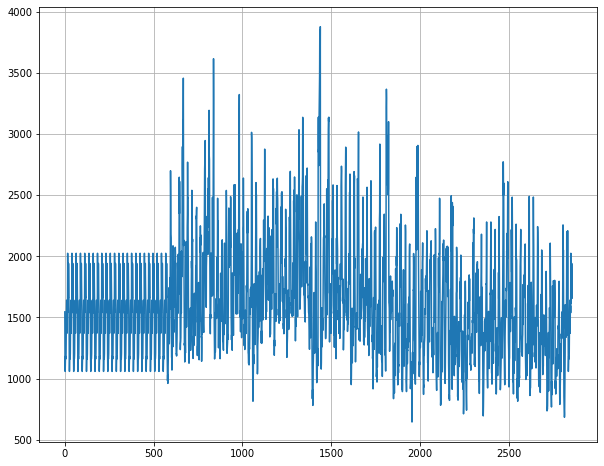

In [11]:
df1=df['USER']
df1.plot(grid = True)

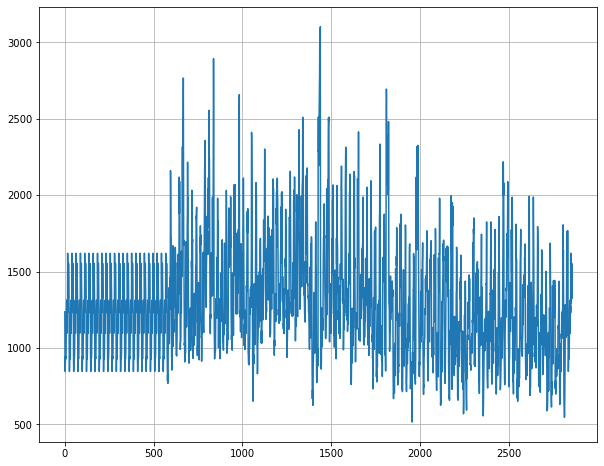

In [12]:
df2=df['RRC']
df2.plot(grid = True)

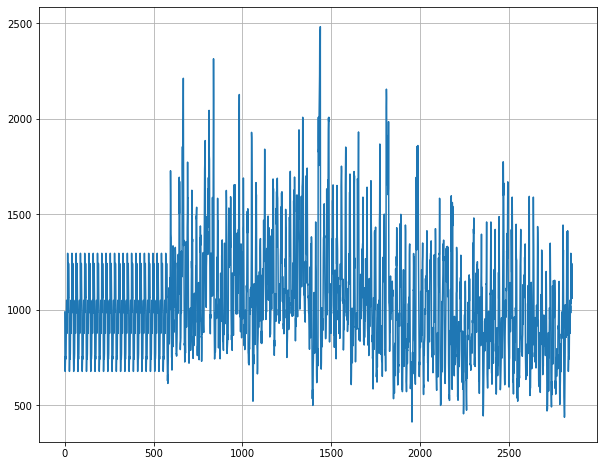

In [13]:
df3=df['ERAB']
df3.plot(grid = True)

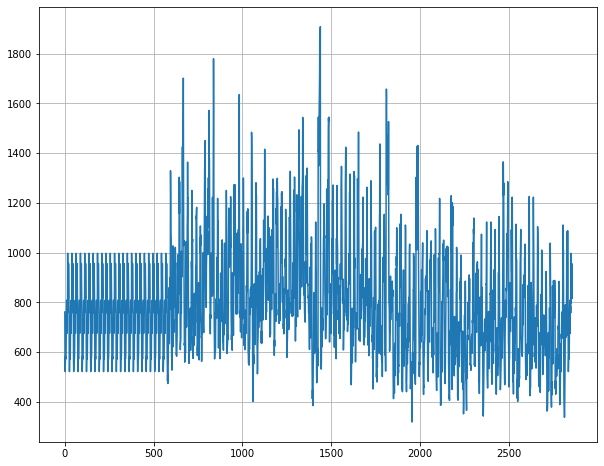

In [15]:
df4=df['PRB']
df4.plot(grid = True)

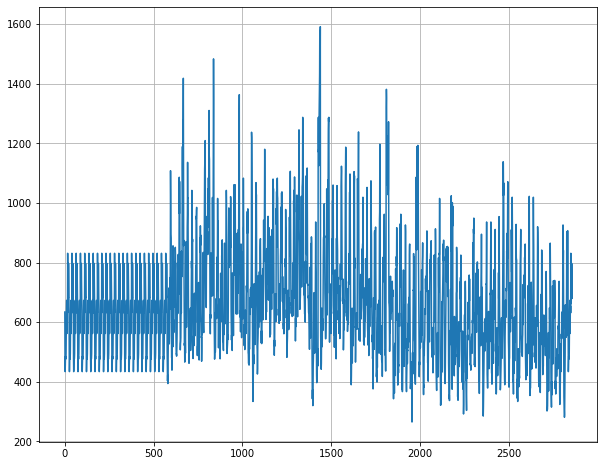

In [16]:
df5=df['THR']
df5.plot(grid = True)

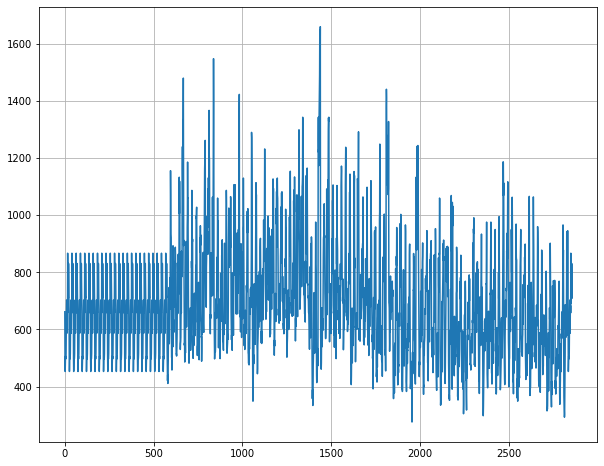

In [17]:
df6=df['DUR']
df6.plot(grid = True)

In [18]:
import plotly.express as px
fig = px.line(df_non_indexed, x = 'Time',y = 'DUR',title = 'DUR with slider')
fig.show()

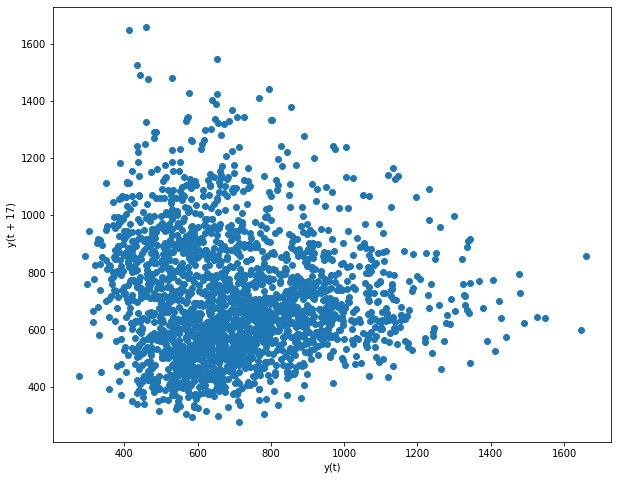

In [54]:
pd.plotting.lag_plot(df['DUR'],lag =17)
#lag plot is a special type of lag scatter plot where x axis is the cuurent time and the y axis is th elag perios
#by default lag period is 1 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E45C6B1C8>,
      dtype=object)

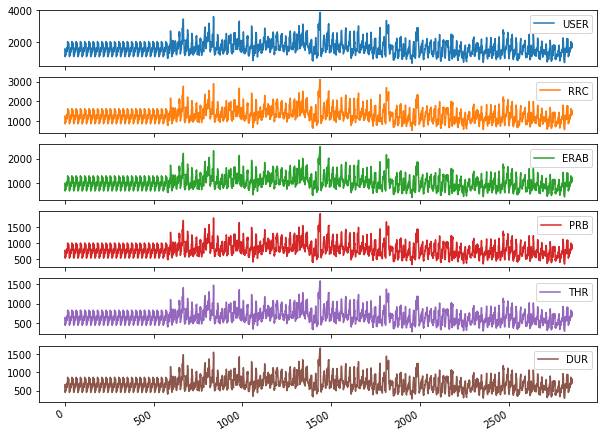

In [19]:
multi_data = df[[ 'USER', 'RRC', 'ERAB', 'PRB', 'THR', 'DUR']]
multi_data.plot(subplots = True)

Text(0.5, 0, 'year_month_day_hour')

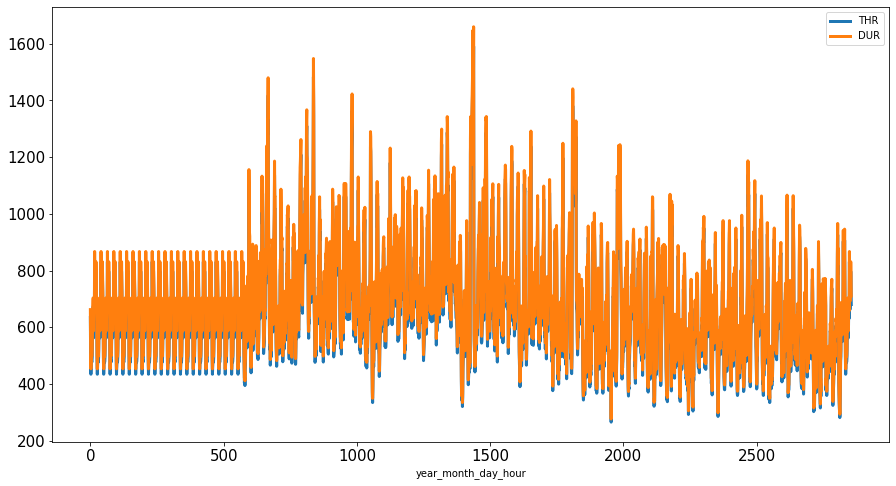

In [21]:
df[['THR','DUR']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')

Text(0.5, 0, 'year_month_day_hour')

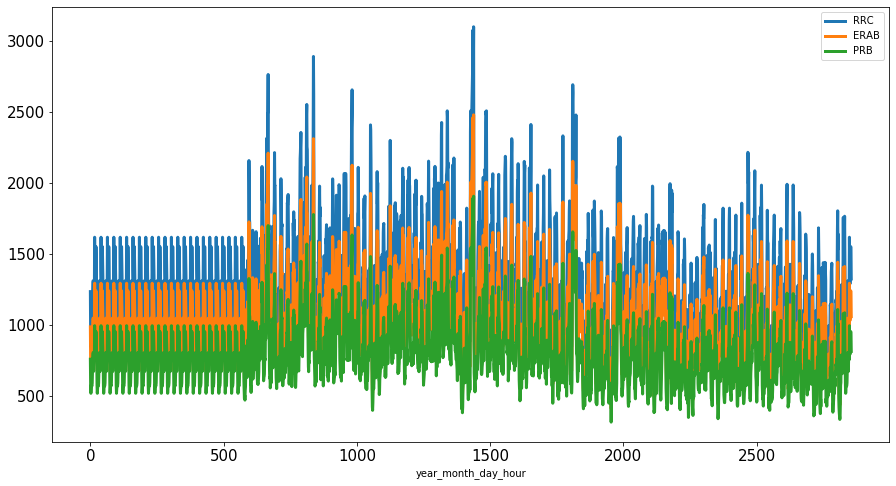

In [22]:
df[['RRC','ERAB','PRB']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')


Text(0.5, 0, 'year_month_day_hour')

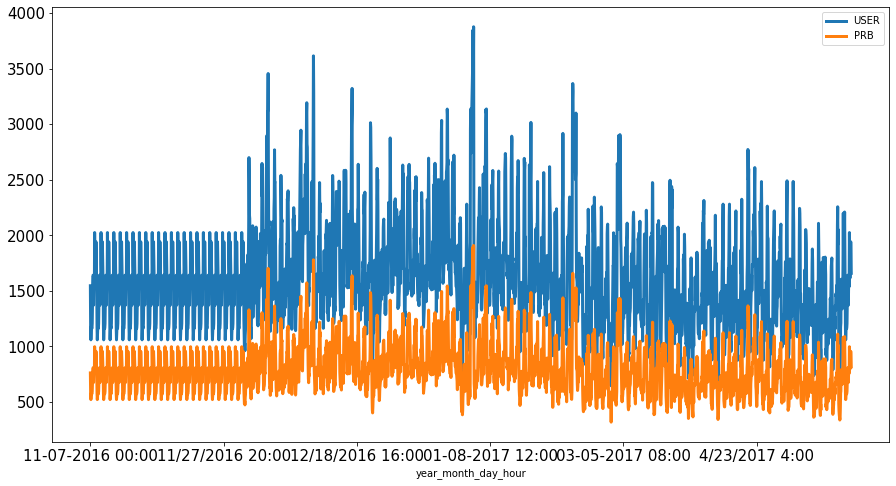

In [40]:
df[['USER','PRB']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')

Text(0.5, 0, 'year_month_day_hour')

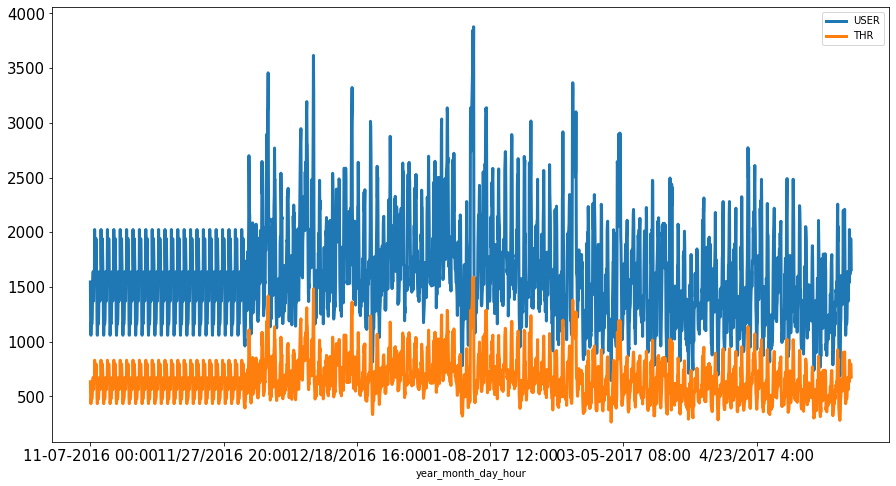

In [41]:
df[['USER','THR']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')

Text(0.5, 0, 'year_month_day_hour')

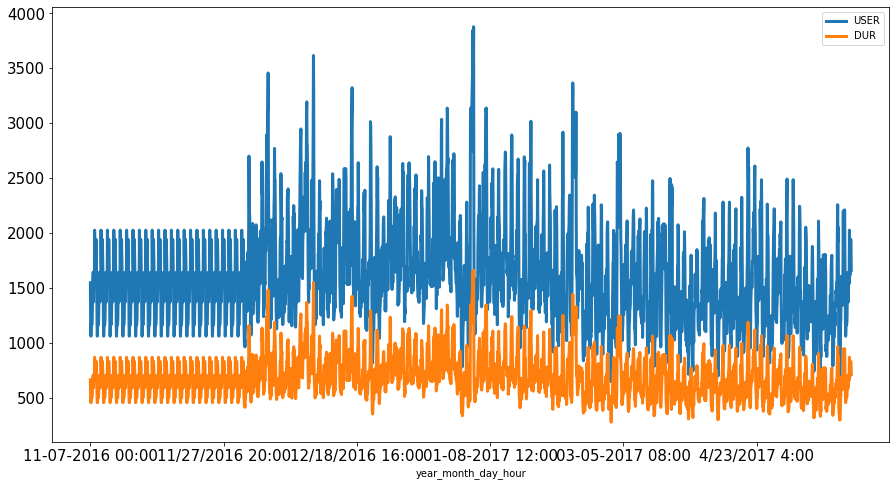

In [42]:
df[['USER','DUR']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')

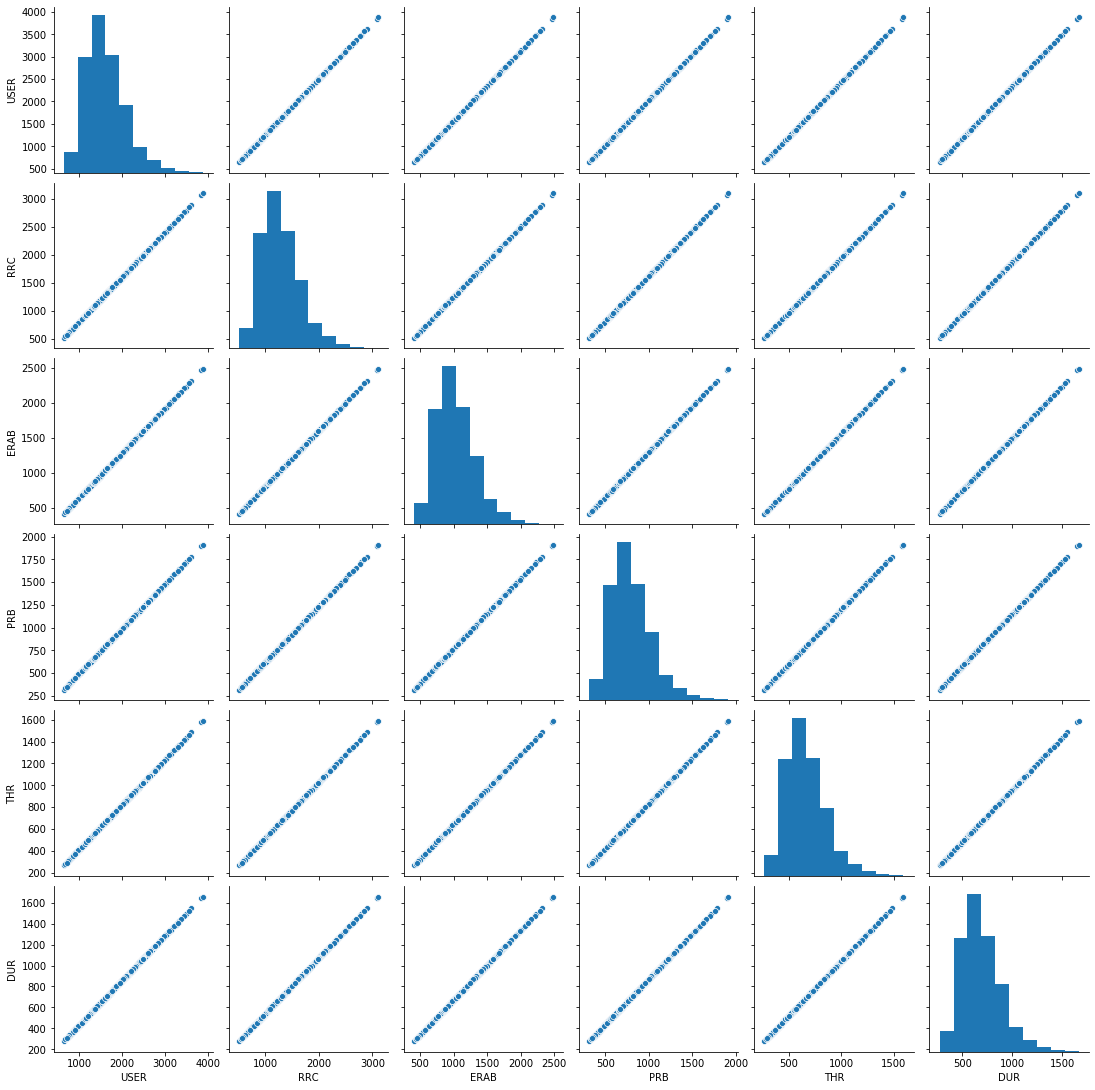

In [23]:
import seaborn as sns
g = sns.pairplot(df[['USER', 'RRC', 'ERAB', 'PRB', 'THR', 'DUR']])

In [24]:
aq_corr = df[['USER', 'RRC', 'ERAB', 'PRB', 'THR', 'DUR']].corr(method = 'pearson')
aq_corr

USER       RRC      ERAB       PRB       THR       DUR
USER  1.000000  1.000000  1.000000  0.999999  0.999999  0.999999
RRC   1.000000  1.000000  0.999999  0.999999  0.999999  0.999999
ERAB  1.000000  0.999999  1.000000  0.999999  0.999998  0.999998
PRB   0.999999  0.999999  0.999999  1.000000  0.999998  0.999998
THR   0.999999  0.999999  0.999998  0.999998  1.000000  0.999998
DUR   0.999999  0.999999  0.999998  0.999998  0.999998  1.000000

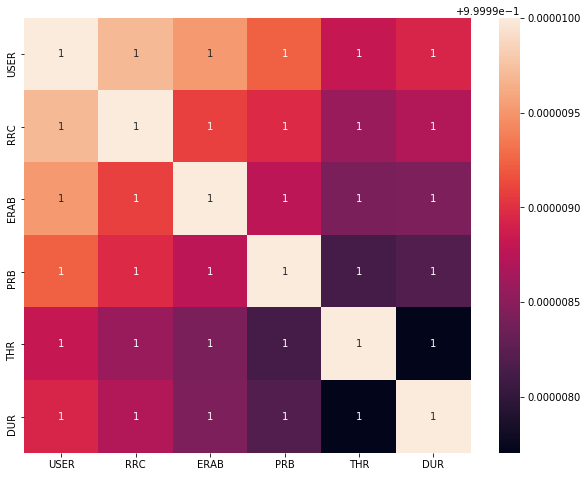

In [25]:
sns.heatmap(aq_corr,annot=True)

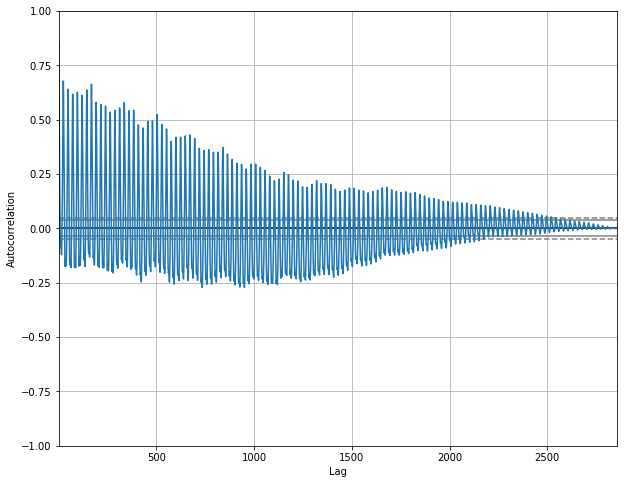

In [48]:
pd.plotting.autocorrelation_plot(df['DUR'])

In [49]:
data=pd.read_csv('C:\Interanship/TelecomAnomalies-main/TelecomAnomalies-main/cc.csv')

In [50]:
data

Time  KPI1  KPI2
0     2016/11/7 0:00  1011  1346
1     2016/11/7 1:00   724   970
2     2016/11/7 2:00   649   859
3     2016/11/7 3:00   703   933
4     2016/11/7 4:00   720   985
...              ...   ...   ...
2851  2017/5/7 19:00  1201  1477
2852  2017/5/7 20:00  1214  1460
2853  2017/5/7 21:00  1358  1742
2854  2017/5/7 22:00  1241  1578
2855  2017/5/7 23:00  1200  1458

[2856 rows x 3 columns]

In [51]:
data = data.set_index('Time')

In [52]:
data

KPI1  KPI2
Time                      
2016/11/7 0:00  1011  1346
2016/11/7 1:00   724   970
2016/11/7 2:00   649   859
2016/11/7 3:00   703   933
2016/11/7 4:00   720   985
...              ...   ...
2017/5/7 19:00  1201  1477
2017/5/7 20:00  1214  1460
2017/5/7 21:00  1358  1742
2017/5/7 22:00  1241  1578
2017/5/7 23:00  1200  1458

[2856 rows x 2 columns]

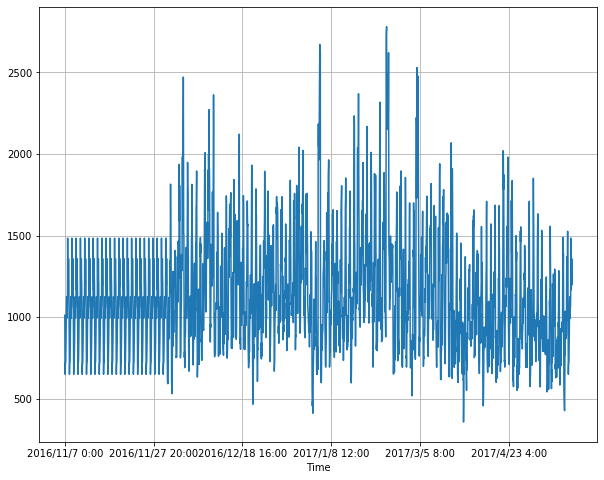

In [32]:
df6=data['KPI1']
df6.plot(grid = True)


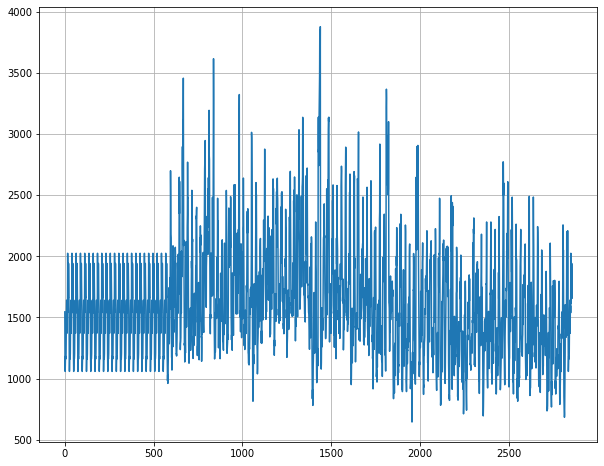

In [33]:
df1=df['USER']
df1.plot(grid = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E49739908>,
      dtype=object)

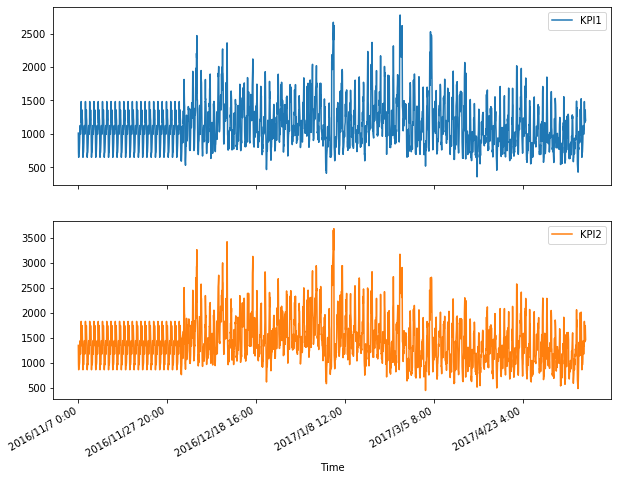

In [34]:
multi_data = data[['KPI1' ,'KPI2']]
multi_data.plot(subplots = True)

Text(0.5, 0, 'year_month_day_hour')

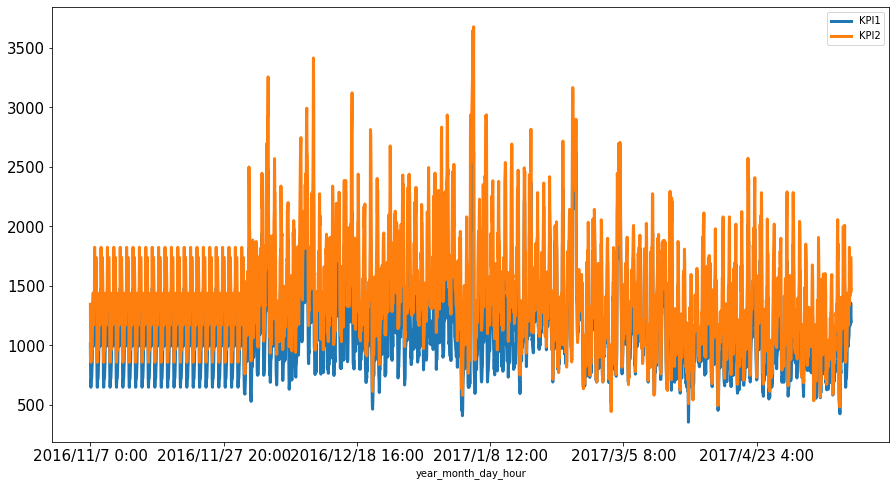

In [36]:
data[['KPI1','KPI2']].plot(figsize=(15,8),linewidth= 3,fontsize = 15)
plt.xlabel('year_month_day_hour')

In [38]:
corr = data[['KPI1','KPI2']].corr(method = 'pearson')
corr

KPI1      KPI2
KPI1  1.000000  0.948724
KPI2  0.948724  1.000000

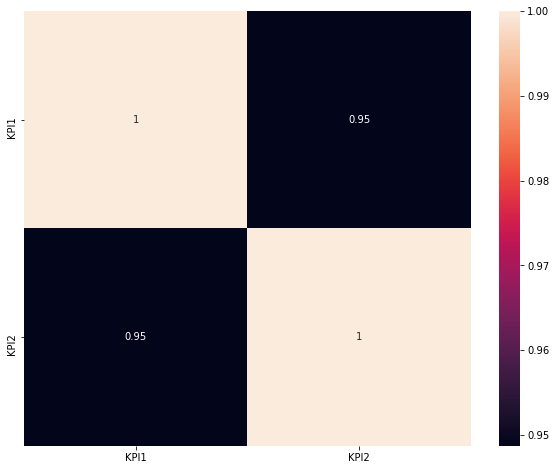

In [39]:
sns.heatmap(corr,annot=True)

In [42]:
data1=pd.read_csv('C:\Interanship/TelecomAnomalies-main/TelecomAnomalies-main/sd.csv')
data1.head()

Time   KPI
0  2016/11/7 0:00  4609
1  2016/11/7 1:00  3882
2  2016/11/7 2:00  3845
3  2016/11/7 3:00  3547
4  2016/11/7 4:00  3305

In [43]:
data1=data1.set_index('Time')
data1.head()

KPI
Time                
2016/11/7 0:00  4609
2016/11/7 1:00  3882
2016/11/7 2:00  3845
2016/11/7 3:00  3547
2016/11/7 4:00  3305

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023E4CD58888>],
      dtype=object)

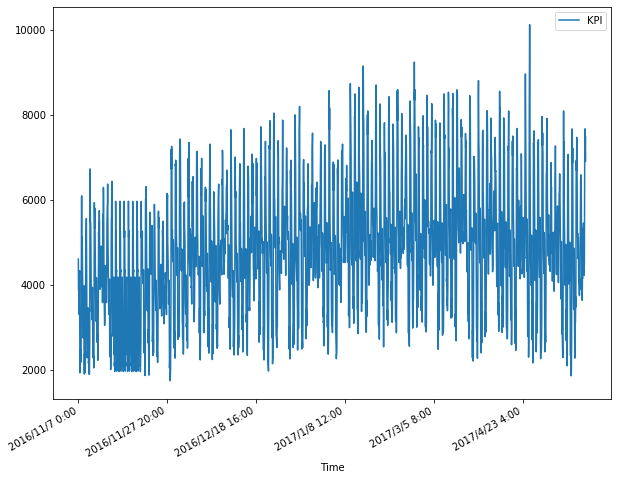

In [44]:
multi_data1 = data1[['KPI']]
multi_data1.plot(subplots = True)

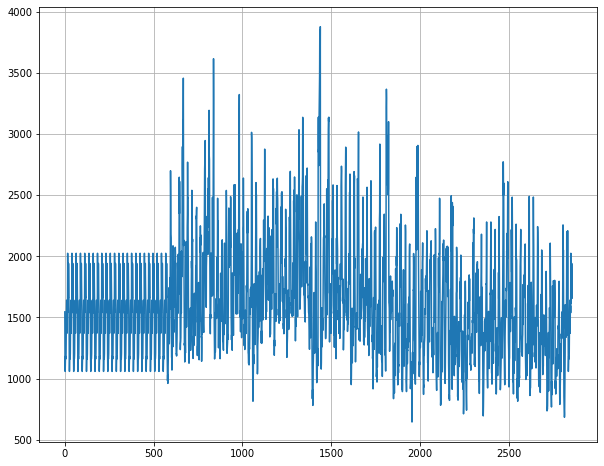

In [45]:
df1=df['USER']
df1.plot(grid = True)

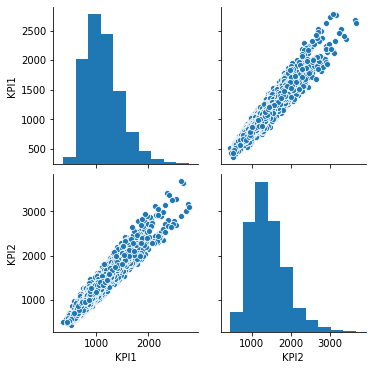

In [53]:
import seaborn as sns
g = sns.pairplot(data[['KPI1','KPI2']])